<a href="https://colab.research.google.com/github/LKSfiuza/Machine-Learning-projects/blob/main/ANALISE%20DE%20SENTIMENTOS%20USANDO%20SPACY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de textos com spaCy

## Etapa 1 - Importação e intalação das bibliotecas

In [9]:
!pip install spacy --upgrade
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [10]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

## Etapa 2 - Carregando a base de dados

In [11]:
base_dados = pd.read_csv('/content/base_treinamento.txt', encoding='utf-8')

In [12]:
base_dados.head(10)

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
5,adoro seu cabelo macio,alegria
6,adoro a cor dos seus olhos,alegria
7,somo tão amáveis um com o outro,alegria
8,sinto uma grande afeição por ele,alegria
9,quero agradar meus filhos,alegria


In [13]:
base_dados.shape

(196, 2)

<Axes: xlabel='count', ylabel='emocao'>

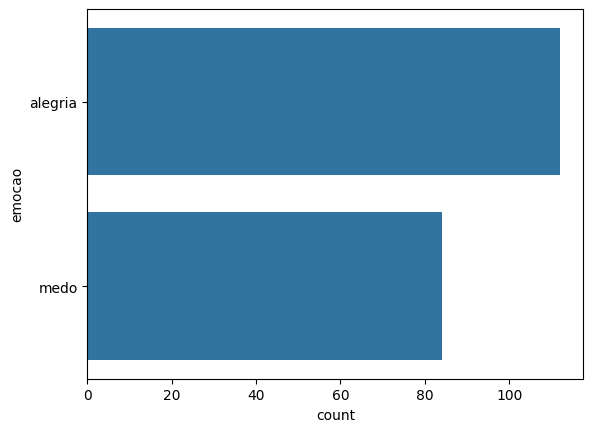

In [14]:
sns.countplot(base_dados['emocao'], label='Contagem')

## Etapa 3 - Função para pré-processamento dos textos

In [15]:
pontuacoes = string.punctuation
pontuacoes


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [17]:
pln = spacy.load('pt_core_news_sm')

In [18]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)
  lista=[]
  for token in documento:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  return lista

In [19]:
teste = preprocessamento('Estou aprendendo processamento de linguagem natural, curso EAD 2026')

In [20]:
teste

'aprender processamento linguagem natural curso ead'

## Etapa 4 - Pré-processamento da base de dados

In [21]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)
base_dados.head(11)

,texto,emocao
0,trabalho agradável,alegria
1,gostar ficar em o aconchego,alegria
2,fiz adesão a o curso hoje,alegria
3,admirar,alegria
4,adorar,alegria
5,adorar cabelo macio,alegria
6,adorar cor de o olho,alegria
7,somo amável outro,alegria
8,sinto afeição,alegria
9,querer agradar filho,alegria


Tratamento de classe

In [22]:
exemplo_base_dados = [['este trabalho é agradavel', {'ALEGRIA': True, 'MEDO': False}],['este lugar continua assustador', {'ALEGRIA': True, 'MEDO': False}]]

In [23]:
exemplo_base_dados[1]

['este lugar continua assustador', {'ALEGRIA': True, 'MEDO': False}]

In [24]:
exemplo_base_dados[0][0]

'este trabalho é agradavel'

In [25]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [26]:
type(exemplo_base_dados[0][1])

dict

In [27]:
base_dados_final = []

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  if emocao == 'alegria':
    dic = {'ALEGRIA': True, 'MEDO': False}
  elif emocao == 'medo':
    dic = {'ALEGRIA': False, 'MEDO': True}
  base_dados_final.append([texto, dic.copy()])

In [28]:
len(base_dados_final)

196

In [29]:
base_dados_final[0]

['trabalho agradável', {'ALEGRIA': True, 'MEDO': False}]

In [30]:
base_dados_final[0][0]

'trabalho agradável'

In [31]:
base_dados_final[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [32]:
type(base_dados_final[0][1])

dict

## Etapa 5 - Criação de um classificador

In [62]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')


In [63]:
categorias

In [64]:
textcat_component = modelo.add_pipe('textcat', last=True)
textcat_component.add_label('ALEGRIA')
textcat_component.add_label('MEDO')
historico = []

In [65]:
print(modelo.pipe_names)


['textcat']


In [82]:
import random
import spacy
from spacy.training import Example

modelo.begin_training()

historico = []

for epoca in range(1000):
    random.shuffle(base_dados_final)
    losses = {}

    for batch in spacy.util.minibatch(base_dados_final, 30):
        examples = []

        for texto, entidades in batch:
            doc = modelo.make_doc(texto)
            example = Example.from_dict(
                doc,
                {"cats": entidades}
            )
            examples.append(example)

        modelo.update(examples, losses=losses)
    historico.append(losses.get("textcat", 0.0))
    if epoca % 100 == 0:
        print(f"Época {epoca} | Losses: {losses}")

    historico.append(losses)


Época 0 | Losses: {'textcat': 1.7222737669944763}
Época 100 | Losses: {'textcat': 2.923366030586211e-11}
Época 200 | Losses: {'textcat': 3.595742735680585e-12}
Época 300 | Losses: {'textcat': 9.080564804860719e-13}
Época 400 | Losses: {'textcat': 3.411410253405505e-13}
Época 500 | Losses: {'textcat': 1.3903617992837682e-13}
Época 600 | Losses: {'textcat': 6.920426341019774e-14}
Época 700 | Losses: {'textcat': 3.343216945840712e-14}
Época 800 | Losses: {'textcat': 1.6357457067385397e-14}
Época 900 | Losses: {'textcat': 8.786065079978103e-15}


In [83]:
historico_100 = historico[::100]

In [84]:
historico_100 = np.array(historico_100)
len(historico_100)

20

Text(0, 0.5, 'ERRO')

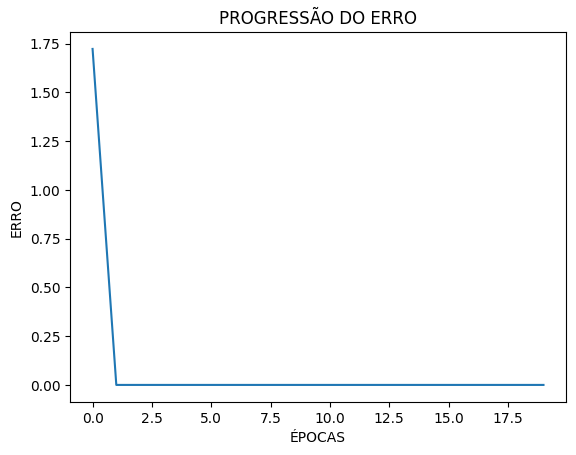

In [85]:
import matplotlib.pyplot as plt

plt.plot(historico_100)
plt.title('PROGRESSÃO DO ERRO')
plt.xlabel('ÉPOCAS')
plt.ylabel('ERRO')

In [86]:
modelo.to_disk('/content/modelo')


## ETAPA 6 - TESTE COM UMA FRASE

In [87]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [89]:
texto_positivo = 'gostei como Flamengo jogou hoje'

In [90]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'gostar flamengo jogar hoje'

In [104]:
previsao = modelo_carregado(texto_positivo)
previsao

gostar flamengo jogar hoje

In [105]:
previsao.cats
if previsao.cats['ALEGRIA'] > 0.5:
  print(f'{previsao.cats}  Emoção positiva')
else:
  print(f'{previsao.cats}  Emoção negativa')

{'ALEGRIA': 0.9999995231628418, 'MEDO': 4.842857492803887e-07}  Emoção positiva


In [106]:
texto_negativo = 'estou com medo de perder a copa'
previsao = modelo_carregado(texto_negativo)
previsao.cats
if previsao.cats['ALEGRIA'] > 0.5:
  print(f'{previsao.cats}  Emoção positiva')
else:
  print(f'{previsao.cats}  Emoção negativa')

{'ALEGRIA': 0.0006535467109642923, 'MEDO': 0.9993464350700378}  Emoção negativa


## ETAPA 7 - AVALIAÇÃO DO MODELO

In [109]:
previsoes = []
for texto in base_dados['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)
previsoes

[{'ALEGRIA': 1.0, 'MEDO': 1.4163988204529687e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.168629092442643e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.4684065519077194e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.9088459641002373e-08},
 {'ALEGRIA': 1.0, 'MEDO': 9.926796273873606e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.4486055022189248e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.8614444147478935e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0766512065506504e-08},
 {'ALEGRIA': 1.0, 'MEDO': 1.1023436385926288e-08},
 {'ALEGRIA': 1.0, 'MEDO': 3.5875700632459484e-08},
 {'ALEGRIA': 1.0, 'MEDO': 8.967855791297552e-09},
 {'ALEGRIA': 1.0, 'MEDO': 1.2211611277734846e-08},
 {'ALEGRIA': 1.0, 'MEDO': 4.740162484750954e-09},
 {'ALEGRIA': 1.0, 'MEDO': 3.179132335162649e-08},
 {'ALEGRIA': 0.9999998807907104, 'MEDO': 9.854848315171694e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.0474095308031792e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.5244260015711006e-08},
 {'ALEGRIA': 1.0, 'MEDO': 7.324155060217663e-09},
 {'ALEGRIA': 1.0, 'MEDO': 7.3032166980624424e-09},
 {'ALEGRIA': 1.0, 'MEDO

In [110]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')
previsoes_final = np.array(previsoes_final)
previsoes_final

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [112]:
respostas_reais = np.array(base_dados['emocao'])
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)


1.0

In [114]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[112,   0],
       [  0,  84]])

## ETAPA FINAL - AVALIAÇÃO DA BASE DE TESTE




In [115]:
base_dados_teste = pd.read_csv('/content/base_teste.txt', encoding='utf-8')
base_dados_teste

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria
...,...,...
79,fui notificado e estou com medo de perder a gu...,medo
80,estou angustiada com meus filhos na rua,medo
81,e abominável o que fazem com os animais,medo
82,foi terrível o tigre quase o matou,medo


In [116]:
base_dados_teste['texto'  ] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head()

,texto,emocao
0,precisar pagar ingresso,alegria
1,ajeitar ficar,alegria
2,fortuna ultrapassar,alegria
3,afortunar,alegria
4,benéfico medida,alegria


In [117]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)
previsoes

[{'ALEGRIA': 3.473642937024124e-05, 'MEDO': 0.9999653100967407},
 {'ALEGRIA': 0.9999737739562988, 'MEDO': 2.6244522814522497e-05},
 {'ALEGRIA': 0.009856969118118286, 'MEDO': 0.9901430606842041},
 {'ALEGRIA': 1.0, 'MEDO': 1.8472690044291085e-08},
 {'ALEGRIA': 0.8487435579299927, 'MEDO': 0.15125644207000732},
 {'ALEGRIA': 0.9999997615814209, 'MEDO': 2.5312127149845765e-07},
 {'ALEGRIA': 0.00024415948428213596, 'MEDO': 0.9997557997703552},
 {'ALEGRIA': 1.0, 'MEDO': 5.2978997189256916e-08},
 {'ALEGRIA': 1.0, 'MEDO': 2.270087051670089e-08},
 {'ALEGRIA': 0.9120383858680725, 'MEDO': 0.08796162903308868},
 {'ALEGRIA': 0.002412770874798298, 'MEDO': 0.9975872039794922},
 {'ALEGRIA': 0.00010997991194017231, 'MEDO': 0.9998899698257446},
 {'ALEGRIA': 0.002954240422695875, 'MEDO': 0.9970458149909973},
 {'ALEGRIA': 0.4588375687599182, 'MEDO': 0.5411624312400818},
 {'ALEGRIA': 1.0, 'MEDO': 3.738529930075174e-09},
 {'ALEGRIA': 1.8859678263538626e-08, 'MEDO': 1.0},
 {'ALEGRIA': 0.04048413038253784, 'MED

In [118]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')
previsoes_final = np.array(previsoes_final)
previsoes_final

array(['medo', 'alegria', 'medo', 'alegria', 'alegria', 'alegria', 'medo',
       'alegria', 'alegria', 'alegria', 'medo', 'medo', 'medo', 'medo',
       'alegria', 'medo', 'medo', 'alegria', 'medo', 'medo', 'alegria',
       'medo', 'medo', 'alegria', 'medo', 'medo', 'alegria', 'alegria',
       'medo', 'medo', 'alegria', 'alegria', 'medo', 'medo', 'alegria',
       'medo', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'medo', 'medo', 'medo', 'alegria', 'medo',
       'medo', 'alegria', 'medo', 'medo', 'alegria', 'medo', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'medo', 'alegria',
       'alegria', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'alegria', 'alegria', 'medo', 'alegria'], dtype='<U7')

In [119]:
respostas_reais = np.array(base_dados_teste['emocao'])
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo'], dtype=object)

In [120]:
accuracy_score(respostas_reais, previsoes_final)

0.5119047619047619

In [121]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[26, 22],
       [19, 17]])